# Case Fraude

Fraudes financeiras são atos ilícitos que visam obter benefícios financeiros indevidos por meio de engano, falsificação, manipulação ou omissão de informações. Essas ações têm o potencial de causar danos financeiros e reputacionais às vítimas, que podem ser pessoas físicas, empresas ou instituições públicas.

Para proteger o patrimônio, a reputação e a confiança dos envolvidos nas transações financeiras, é fundamental evitar fraudes financeiras. Além disso, a prevenção de fraudes financeiras ajuda a combater a lavagem de dinheiro, a corrupção, o terrorismo e outros crimes que ameaçam a segurança e an estabilidade da sociedade.

É necessário adotar controle interno, educação financeira, monitoramento e denúncia para evitar fraudes financeiras. Algumas dessas ações incluem:

 * Verifique se os documentos, as assinaturas e os dados cadastrais dos clientes são verdadeiros de acordo com as regras e procedimentos internos de uma instituição financeira.
 * Usar senhas fortes e exclusivas, evitar compartilhar senhas com outras pessoas e alterá-las regularmente.
 * Não abra e-mails, mensagens ou links suspeitos que possam conter phishing, vírus ou malware.
 * Não fornecer dados pessoais, bancários ou financeiros por telefone, e-mail ou redes sociais sem verificar an identidade e an origem do solicitante
 * Desconfie de ofertas extremamente vantajosas que prometem lucros garantidos, rápidos ou fáceis.
 * Verifique se houve movimentações ou cobranças indevidas nos relatórios de investimentos, faturas de cartão de crédito e extratos bancários.
 * Denunciar imediatamente qualquer suspeita ou ocorrência de fraude financeira aos órgãos competentes, como a polícia, o banco, o órgão regulador ou o serviço de proteção ao crédito.



<center>
<img src = "https://th.bing.com/th/id/OIG.Q2Asf6PXerKQ9GkvVECD?pid=ImgGn" width = "60%">
<a href="https://www.bing.com/images/create/fraudes-financeiras-digital-com-alerta-de-perigo/65485503322145358e1f2789e10bf4bc?FORM=GENCRE">Image by studiogstock</a> on Microsoft Bing
</center>

Com a ajuda de cientistas de dados pode-se fazer o seguinte:

 * Examinar dados de várias fontes e formatos, como registros, documentos, transações, mídias sociais e dispositivos, entre outros, para encontrar padrões, anomalias, comportamentos e relações que possam indicar an ocorrência ou a tentativa de fraude.
 * Desenvolver e aplicar modelos estatísticos, algoritmos e técnicas de aprendizado de máquina para detectar e prever eventos fraudulentos com dados históricos e em tempo real.
 * Construir e executar soluções de inteligência artificial, como sistemas de pontuação, alertas, recomendações e bloqueios, para automatizar e otimizar o processo de prevenção de fraudes e reduzir os falsos positivos, os custos operacionais e os riscos legais.
 * Os resultados das análises devem ser transmitidos de forma compreensível, visual e clara para ajudar os gestores, auditores, investigadores e autoridades competentes a tomar decisões e agir.

Como resultado, o cientista de dados é um profissional que ajuda a proteger o patrimônio, a legitimidade e a confiança das instituições financeiras e de seus clientes utilizando dados e análises para combater a fraude.


# Dataset

No Dataframe que iremos trabalhar, temos as seguintes informações:

* A pontuação de 1 a 10 são notas de um escritório de crédito que a empresa obteve para descobrir se o comprador é confiável ou outros dados anonimizados que não temos informações sobre o país: pais de compra
* Produto: produto que está sendo comprado no e-commerce
* A categoria_produto indica a categoria na qual esse produto se encaixa.
* Entrega_doc_1 a entrega_doc_3: Documentos necessários para fazer a conta. 0 = N = não forneceu nada. Y = 1 = entregou. Se estiver vazio, pense que não entregou
* Score_fraude_modelo é a pontuação que o modelo atual fornece. É a probabilidade de que essa compra seja um engano. A probabilidade de que o modelo seja fraudulento aumenta à medida que se aproxima de 100.
* Fraude: informações sobre se a compra foi falsa ou não. Foi adicionado após alguns dias para obter opiniões reais sobre se era fraudulento ou não. 0 se não era fraudulento e 1 se era.

Informações relevantes:

* Para esse caso, os dados são propositalmente anonimizados.
* Você precisará fazer algumas suposições para resolvê-lo. Verifique todas as suposições que fazer.
* Sabemos que an empresa perde cem por cento do valor de cada pagamento aprovado corretamente, enquanto perdemos cem por cento do valor de cada fraude aprovada.


## Importando dados

In [16]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


Iremos importar as bibliotecas que iremos usar no decorrer do projeto.

In [17]:
# Bibliotecas padrão para manipulação dos dados
import pandas as pd
import numpy as np

# Análise dos dados
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importando o dataframe
df_original = pd.read_csv('C:/Users/Winicius/Desktop/Pastas/PED/dados.csv', sep = ',')

In [5]:
# Criando uma cópia para casos de fazer alterações, ainda teremos o principal
df = df_original.copy()

# Análise Explratória dos dados (EDA)

In [6]:
# Verificando as 5 primeiras colunas para nos familiarizarmos com os dados
df.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


In [8]:
# Verificando o tamanho do Dataframe
df.shape

(150000, 20)

In [9]:
# Verificando os tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   score_1              150000 non-null  int64  
 1   score_2              137016 non-null  float64
 2   score_3              137016 non-null  float64
 3   score_4              149635 non-null  float64
 4   score_5              150000 non-null  float64
 5   score_6              149989 non-null  float64
 6   pais                 149806 non-null  object 
 7   score_7              150000 non-null  int64  
 8   produto              150000 non-null  object 
 9   categoria_produto    150000 non-null  object 
 10  score_8              150000 non-null  float64
 11  score_9              149989 non-null  float64
 12  score_10             149635 non-null  float64
 13  entrega_doc_1        150000 non-null  int64  
 14  entrega_doc_2        41143 non-null   object 
 15  entrega_doc_3    

In [10]:
# Verificando a quantidade de valores faltantes
df.isnull().sum()

score_1                     0
score_2                 12984
score_3                 12984
score_4                   365
score_5                     0
score_6                    11
pais                      194
score_7                     0
produto                     0
categoria_produto           0
score_8                     0
score_9                    11
score_10                  365
entrega_doc_1               0
entrega_doc_2          108857
entrega_doc_3               0
data_compra                 0
valor_compra                0
score_fraude_modelo         0
fraude                      0
dtype: int64

In [13]:
# Verificando a porcentagem dos valores faltantes
(df.isnull().sum()/df.shape[0]*100).round(3)

score_1                 0.000
score_2                 8.656
score_3                 8.656
score_4                 0.243
score_5                 0.000
score_6                 0.007
pais                    0.129
score_7                 0.000
produto                 0.000
categoria_produto       0.000
score_8                 0.000
score_9                 0.007
score_10                0.243
entrega_doc_1           0.000
entrega_doc_2          72.571
entrega_doc_3           0.000
data_compra             0.000
valor_compra            0.000
score_fraude_modelo     0.000
fraude                  0.000
dtype: float64

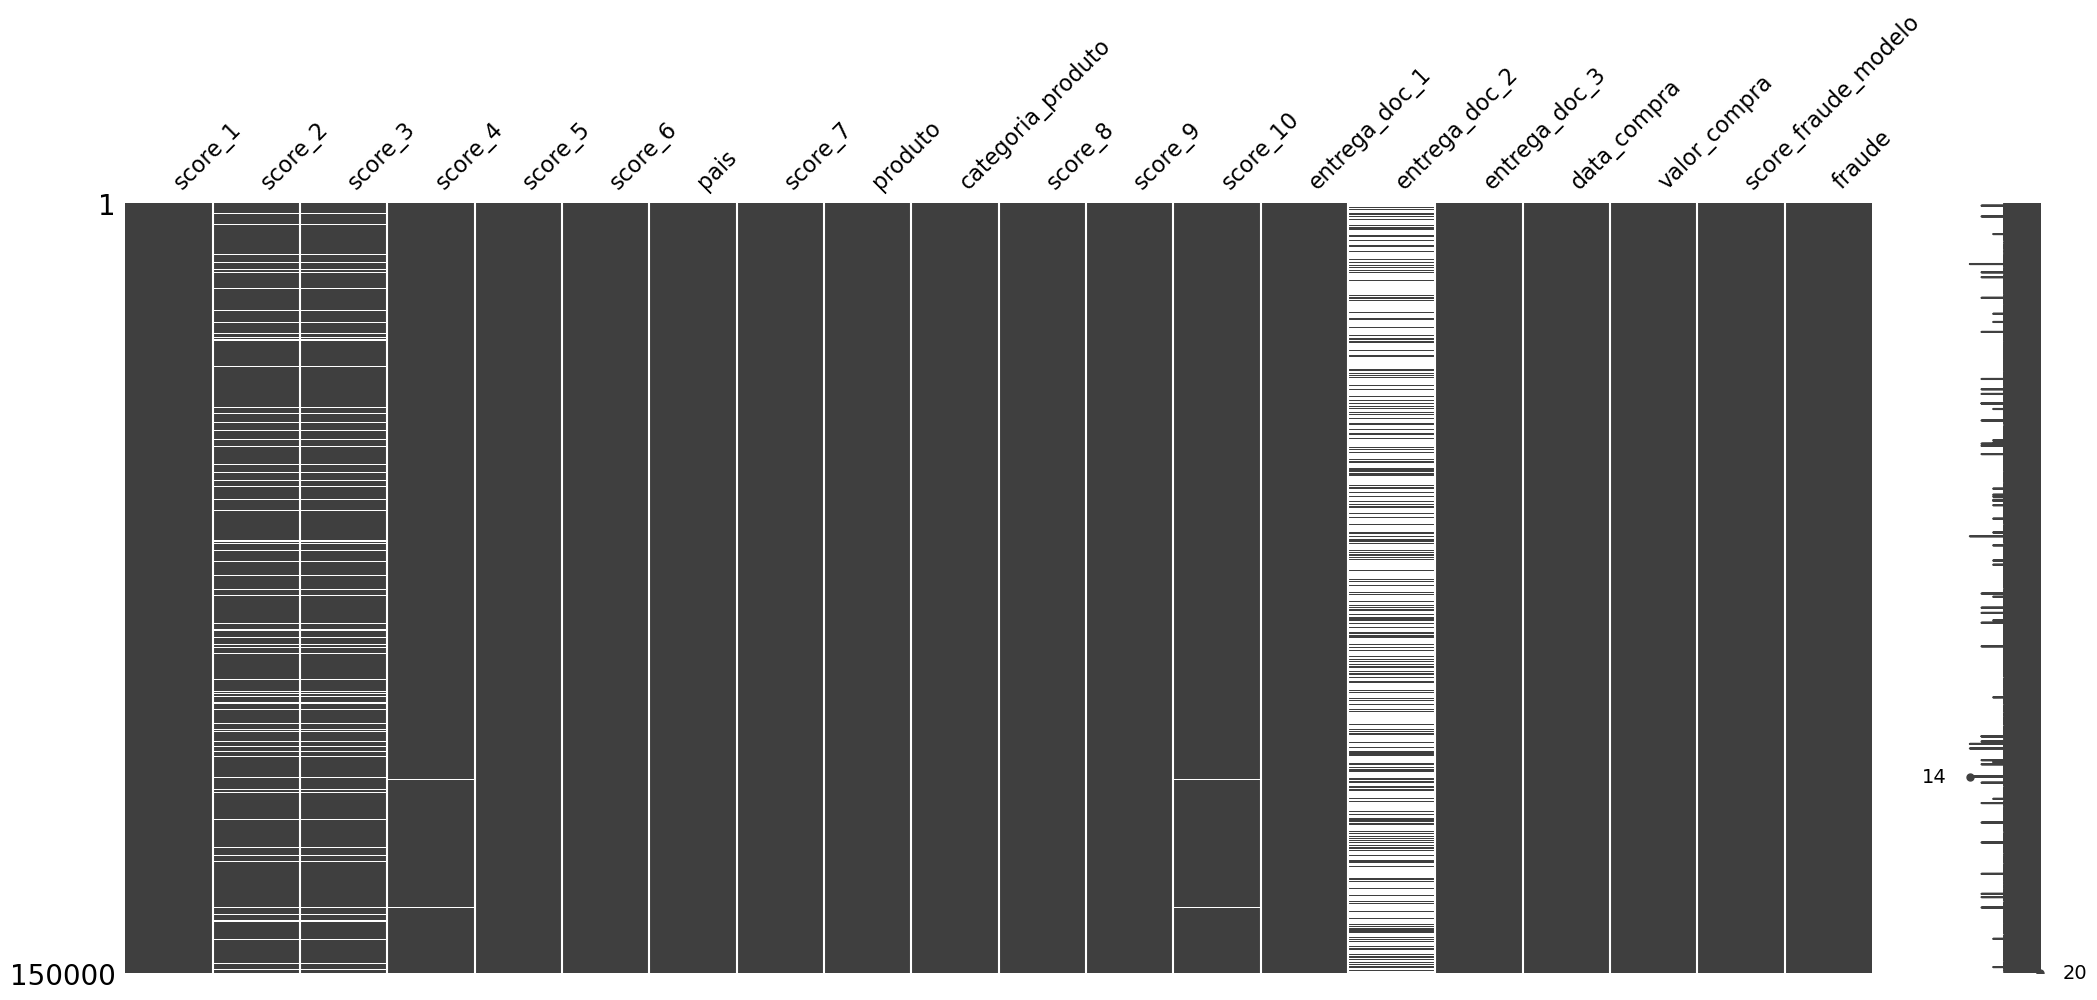

In [19]:
missingno.matrix(df);

É evidente que a variável entrega_doc_2 apresenta uma grande quantidade de valores ausentes, mas essa falta de informação pode ser um bom indicador para detectar possíveis fraudadores. Tendo isso em mente, mais adiante, iremos transformar essa variável em uma coluna booleana, na qual os clientes que não entregaram os documentos serão representados por 0 e os que entregaram por 1.

## Análise Univariada

### Fraudadores

In [20]:
# Contar a quantidade de valores 1 'Fraude' e 0 'real' na coluna fraude
contagem_fraude = df['fraude'].value_counts()
contagem_fraude

fraude
0    142500
1      7500
Name: count, dtype: int64

In [21]:
# Calcular a porcentagem de cada valor
porcentagem_fraude = contagem_fraude/df.shape[0]*100

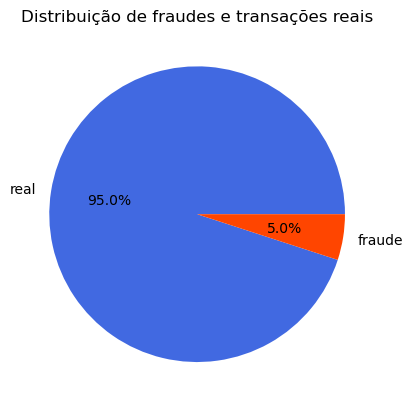

In [38]:
plt.pie(porcentagem_fraude, labels=['real', 'fraude'], autopct='%1.1f%%', colors=['#4169E1', '#FF4500']) 
plt.title('Distribuição de fraudes e transações reais') 
plt.show()

Observa-se uma grande discrepância entre os valores, sendo que apenas 5% correspondem a clientes que cometeram fraude.

### Scores

#### Score 1

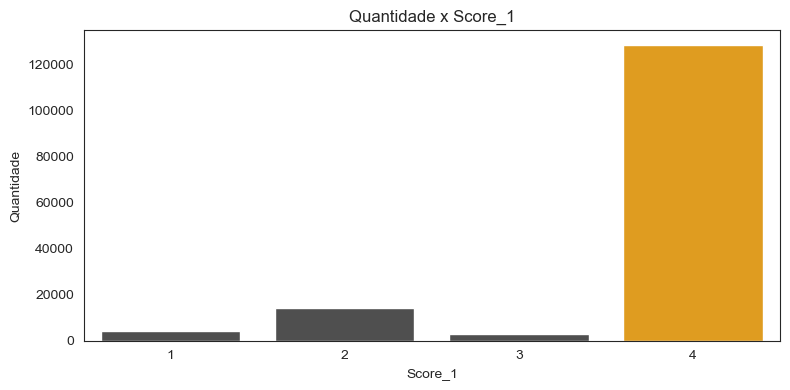

In [68]:
# Definindo o estilo "poster"
sns.set_style('white')

# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(8, 4))

# Definindo a paleta de cores
colors = ['#4F4F4F', '#4F4F4F', '#4F4F4F', '#FFA500', '#00FFFF']
sns.set_palette(sns.color_palette(colors))

# Countplot
sns.countplot(x='score_1', data=df)

# Definindo os rótulos e títulos
ax.set_xlabel('Score_1')
ax.set_ylabel('Quantidade')
ax.set_title('Quantidade x Score_1')

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

Nota-se que a maioria dos usuarios estão presentes na categoria 4.

In [69]:
# Agrupando os dados do DataFrame df pela coluna 'score_1' e 'fraude'
score1_fraude = df.groupby(['score_1','fraude']).size().unstack()
score1_fraude

fraude,0,1
score_1,,
1,3800,395
2,13260,1118
3,2590,258
4,122850,5729


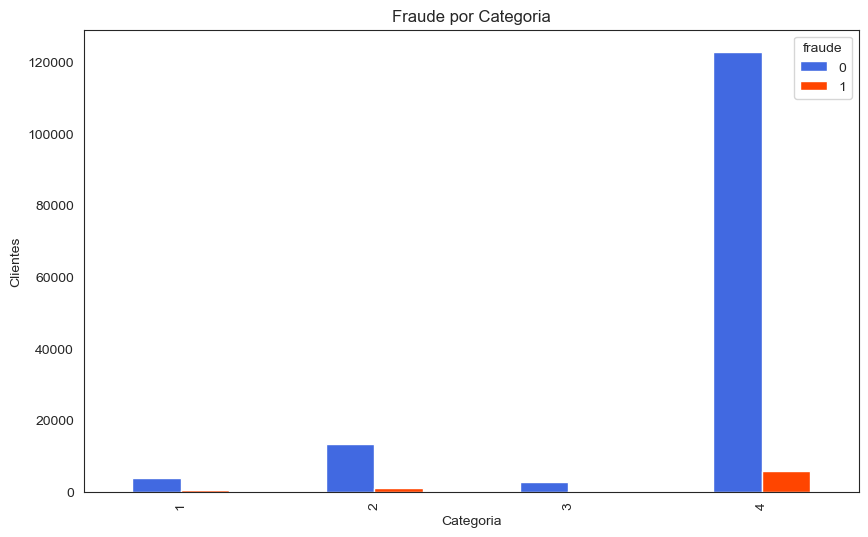

In [75]:
# O método plot é chamado para criar um gráfico de barras
score1_fraude.plot(kind='bar', color = ['#4169E1', '#FF4500'], figsize=(10, 6))
plt.title('Fraude por Categoria')
plt.ylabel('Clientes')
plt.xlabel('Categoria')
plt.show()

A partir dos resultados, podemos tirar algumas conclusões sobre a fraude e o score_1 por categoria:

* A categoria 4 tem o maior número de clientes, tanto fraudadores quanto reais, com 122850 e 5729, respectivamente. Isso significa que essa categoria representa 88,5% dos clientes reais e 82,8% dos clientes fraudadores.
* A categoria 2 tem o segundo maior número de clientes, com 13260 reais e 1118 fraudadores. Essa categoria representa 9,6% dos clientes reais e 16,2% dos clientes fraudadores.
* A categoria 1 tem o menor número de clientes, com apenas 3800 reais e 395 fraudadores. Essa categoria representa 2,7% dos clientes reais e 0,6% dos clientes fraudadores.
* A categoria 3 tem um número muito baixo de clientes, com 2590 reais e 258 fraudadores. Essa categoria representa 1,9% dos clientes reais e 0,4% dos clientes fraudadores.

Podemos observar que a categoria 4 é a mais propensa a ter clientes fraudadores, seguida pela categoria 2. As categorias 1 e 3 são as menos propensas a ter clientes fraudadores.

Também podemos calcular a taxa de fraude por categoria, que é a porcentagem de clientes fraudadores em relação ao total de clientes da categoria. A taxa de fraude por categoria é a seguinte:

* Categoria 1: 9,4%
* Categoria 2: 7,8%
* Categoria 3: 9,1%
* Categoria 4: 4,5%

Podemos ver que a categoria 4, apesar de ter o maior número absoluto de clientes fraudadores, tem a menor taxa de fraude por categoria. Isso significa que essa categoria tem uma proporção menor de clientes fraudadores em relação aos clientes reais. Por outro lado, a categoria 1 tem a maior taxa de fraude por categoria, o que significa que essa categoria tem uma proporção maior de clientes fraudadores em relação aos clientes reais.

#### Score 2 a 10

In [77]:
def plot_histograms(data, columns):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10)) # Cria uma grade de 3x3 para os histogramas
    axes = axes.ravel() # Transforma a matriz de eixos em um vetor para facilitar o acesso

    for i, col in enumerate(columns):
        axes[i].hist(data[col], bins=20, color='blue', alpha=0.7)
        axes[i].set_title(f'Histograma de {col}')
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frequência')

    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

In [83]:
def plot_boxplots(data, columns):
    fig, axes = plt.subplots(3, 3, figsize=(15, 10)) # Cria uma grade de 3x3 para os boxplots
    axes = axes.ravel() # Transforma a matriz de eixos em um vetor para facilitar o acesso

    for i, col in enumerate(columns):
        axes[i].boxplot(data[col], patch_artist = True,
        notch = True, vert = False) # Personaliza o boxplot
        axes[i].set_title(f'Boxplot de {col}')
        axes[i].set_xlabel('Coluna')
        axes[i].set_ylabel('Valor')

    plt.tight_layout() # Ajusta o layout para evitar sobreposição
    plt.show()

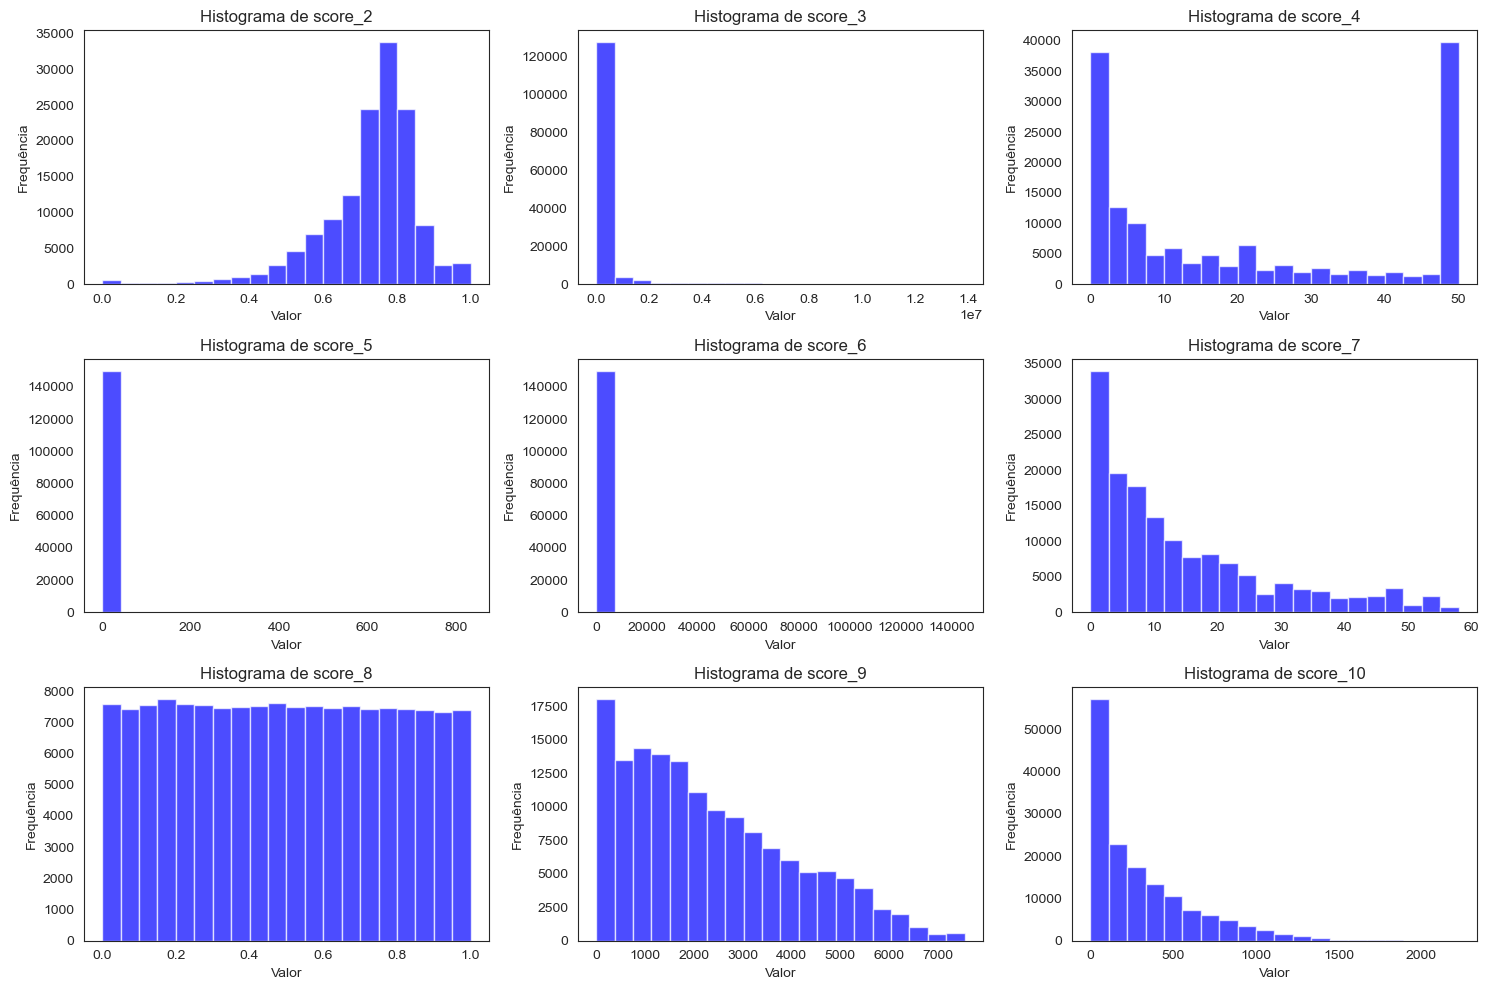

In [78]:
columns = ['score_2', 'score_3', 'score_4', 'score_5', 
           'score_6', 'score_7', 'score_8', 'score_9', 
           'score_10']
plot_histograms(df, columns)

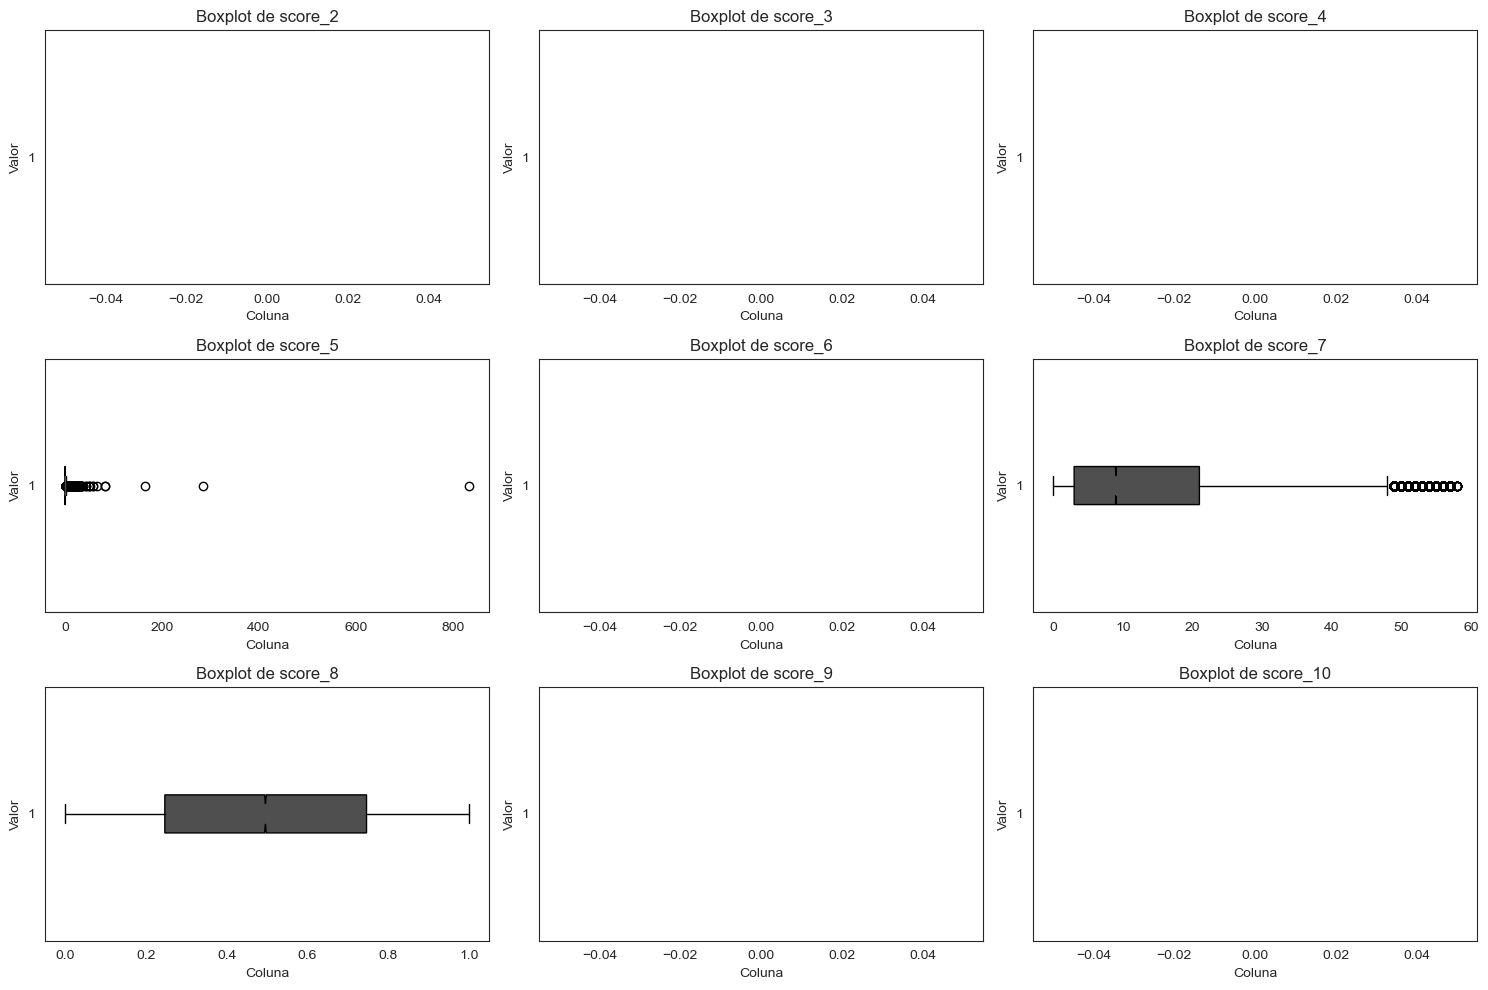

In [84]:
columns = ['score_2', 'score_3', 'score_4', 'score_5', 
           'score_6', 'score_7', 'score_8', 'score_9', 
           'score_10']
plot_boxplots(df, columns)

Pode-se perceber que:
* O histograma Score_2, apresenta uma assimetria a esqueda com o pico em torno de 0.8, ou seja, a grande parte dos clientes com alto score.
* O histograma Score_4, apresenta 2 picos um em torno de 0 e outro de 50.
* Os histogramas dos Scores 7, 9, 10, ao contrario do Score_2 tem uma simetria a direita, ou seja, grande parte dos clientes com score baixo.
* O histograma Score_8 segue uma distribuição uniforme, logo, a probabilidade de um cliente ter qualquer pontuação no intervalo definido é constante.
* Os histogramas Scores 3, 5, 6 devem ser analisádos mais a fundo.
* Podemos notar que nos BoxPlot dos Scores 5 e 7, temos alguns outliers.